In [2]:
#Fire Vs No ire
import os
from google.colab import drive


In [3]:
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

from io import BytesIO
from PIL import Image


data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.1),
        ]
    )



In [4]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
!wget https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip

--2021-05-02 12:28:30--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-05-02 12:28:30--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20194537 (19M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  19.26M  60.1MB/s    in 0.3s    

2021-05-02 12:28:32 (60.1 MB/s) - ‘data.zip’ saved [20194537/20194537]



In [6]:
from zipfile import ZipFile
file_name = "data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
path, dirs, files = next(os.walk("data/cats"))
print(len(files))
path, dirs, files = next(os.walk("data/dogs"))
print(len(files))
path, dirs, files = next(os.walk("data/Humans"))
print(len(files))
path, dirs, files = next(os.walk("data/horses"))
print(len(files))

202
202
202
202


In [8]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [37]:
def label_img(img):
    world_label = img.replace("-",".")
    word_label = img.split('.')[0]
    if word_label =='cat': return [1,0,0,0]
    elif word_label == 'dog': return [0,1,0,0]
    elif word_label == 'horse': return [0,0,1,0]
    else: return [0,0,0,1]

In [35]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)


In [12]:
base_dir = "/content/data"

In [13]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [16]:
original_datasetHum_dir = "/content/data/Humans"
original_datasetCat_dir = "/content/data/cats"
original_datasetDog_dir = "/content/data/dogs"
orifinal_datasetHorse_dir = "/content/data/horses"

In [17]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_datasetCat_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_datasetCat_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_datasetCat_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_datasetDog_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_datasetDog_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_datasetDog_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['rider-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_datasetHum_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_datasetHum_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_datasetHum_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['horse-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(orifinal_datasetHorse_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(orifinal_datasetHorse_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(orifinal_datasetHorse_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)



In [38]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [19]:
#It wasn't used. there are 7 sub-directory in the directory therefore 7 classes
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/data", validation_split=0.2, subset="training", seed=1337,batch_size=32,image_size=(224,224), shuffle=True)

Found 1612 files belonging to 7 classes.
Using 1290 files for training.


In [20]:
#It wasn't used. there are 7 sub-directory in the directory therefore 7 classes
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/data", validation_split=0.2, subset="validation", seed=1337,image_size=(224,224),
        batch_size=32, shuffle=True)

Found 1612 files belonging to 7 classes.
Using 322 files for validation.


In [39]:
## VGG 19
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [40]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")

model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [41]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]


In [46]:
history = model.fit(train_X, train_y,
                             batch_size=10,
                              epochs=15, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/15
40/40 [==============================] - 305s 8s/step - loss: 1.4162 - acc: 0.5427 - val_loss: 0.3243 - val_acc: 0.8700
Epoch 2/15
40/40 [==============================] - 300s 8s/step - loss: 0.1150 - acc: 0.9845 - val_loss: 0.2478 - val_acc: 0.9300
Epoch 3/15
40/40 [==============================] - 296s 7s/step - loss: 0.1831 - acc: 0.9340 - val_loss: 0.2247 - val_acc: 0.9200
Epoch 4/15
40/40 [==============================] - 298s 8s/step - loss: 0.0194 - acc: 0.9969 - val_loss: 0.2447 - val_acc: 0.9050
Epoch 5/15
40/40 [==============================] - 299s 8s/step - loss: 0.0188 - acc: 1.0000 - val_loss: 0.1927 - val_acc: 0.9350
Epoch 6/15
40/40 [==============================] - 309s 8s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.2489 - val_acc: 0.9200
Epoch 7/15
40/40 [==============================] - 300s 8s/step - loss: 0.0152 - acc: 0.9932 - val_loss: 0.2168 - val_acc: 0.9250
Epoch 8/15
40/40 [==============================] - 299s 8s/step - loss: 0.0021 - a

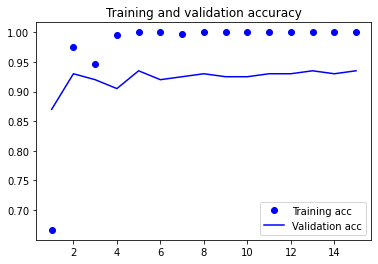

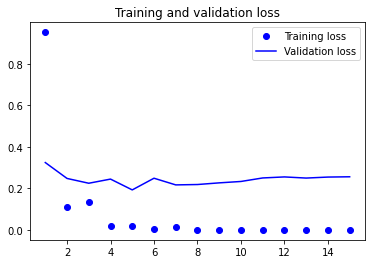

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

##auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
##print("AUC:\t\t", auc)

Train Accuracy:	 1.0
Val Accuracy:	 0.9350000023841858
Test Accuracy:	 0.8846153846153846
Precision:	 0.6523672257162824
Recall:		 0.6370192307692307
F1 Score:	 0.6435627217235853


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
